In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


NOTES

- causative agent of WNS is Pseudogymnoascus destructans
- Bats were swabbed from 36 sites in the western USA from 2015 to 2018. Swabs were taken from the wings and stored at 4ºC.
- The sample plates were checked weekly, and unique fungal colonies were isolated. The number of colonies (CFUs) was counted. Fungi were then identified by analyzing their rRNA gene. Sequences were compared and collapsed into operational taxonomic units (OTUs) based on similarity thresholds.

In [ ]:
data = pd.read_csv('/content/west_master_table_final.csv')
data.head()

,Sample Collection Date,Sample ID no.,Host Species,Sample Location - County,Sample Location - State,Sample Location - Site,Isolate ID No.,Genbank,CFU,Fungus Classification - Phylum,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,20170613,46379_1060,Antrozous pallidus,Mohave,AZ,AZ1,46379_1060_1LNA,MK782159,30,Basidiomycota,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20170613,46379_1060,Antrozous pallidus,Mohave,AZ,AZ1,46379_1060_1SD,MK782160,3,Ascomycota,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20170613,46379_1060,Antrozous pallidus,Mohave,AZ,AZ1,46379_1060_2LNA,MK782161,5,Basidiomycota,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20170613,46379_1060,Antrozous pallidus,Mohave,AZ,AZ1,46379_1060_3LNA,MK782162,5,Basidiomycota,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20170614,46379_1062,Eptesicus fuscus,Mohave,AZ,AZ1,46379_1062_1LNA,MK782163,1,Basidiomycota,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(596, 28)

In [ ]:
df = data.dropna(axis=1, how='all').copy()
df.fillna("Unknown", inplace=True)


df.head()

,Sample Collection Date,Sample ID no.,Host Species,Sample Location - County,Sample Location - State,Sample Location - Site,Isolate ID No.,Genbank,CFU,Fungus Classification - Phylum,Fungus Classification - Class,Fungus Classification - Order,Fungus Classification - Family,Fungus Classification -Genus,Fungus Classification - Species,OTU (cluster)
0,20170613,46379_1060,Antrozous pallidus,Mohave,AZ,AZ1,46379_1060_1LNA,MK782159,30,Basidiomycota,Tremellomycetes,Filobasidiales,Filobasidiaceae,Filobasidium,Unknown,cluster207
1,20170613,46379_1060,Antrozous pallidus,Mohave,AZ,AZ1,46379_1060_1SD,MK782160,3,Ascomycota,Dothideomycetes,Dothideales,Dothideaceae,Endoconidioma,populi,cluster21
2,20170613,46379_1060,Antrozous pallidus,Mohave,AZ,AZ1,46379_1060_2LNA,MK782161,5,Basidiomycota,Cystobasidiomycetes,Cystobasidiales,Cystobasidiaceae,Cystobasidium,psychroaquaticum,cluster166
3,20170613,46379_1060,Antrozous pallidus,Mohave,AZ,AZ1,46379_1060_3LNA,MK782162,5,Basidiomycota,Cystobasidiomycetes,Cystobasidiales,Cystobasidiaceae,Cystobasidium,psychroaquaticum,cluster166
4,20170614,46379_1062,Eptesicus fuscus,Mohave,AZ,AZ1,46379_1062_1LNA,MK782163,1,Basidiomycota,Cystobasidiomycetes,Cystobasidiales,Unknown,Unknown,Unknown,cluster167


In [ ]:
data.shape

(596, 28)

In [ ]:
df['Sample Collection Date'] = pd.to_datetime(df['Sample Collection Date'], format='%Y%m%d', errors='coerce')

# find the unknown 'Sample Collection Date' entries
invalid_dates = df[df['Sample Collection Date'].isna()]
invalid_dates

,Sample Collection Date,Sample ID no.,Host Species,Sample Location - County,Sample Location - State,Sample Location - Site,Isolate ID No.,Genbank,CFU,Fungus Classification - Phylum,Fungus Classification - Class,Fungus Classification - Order,Fungus Classification - Family,Fungus Classification -Genus,Fungus Classification - Species,OTU (cluster)
81,NaT,45699_970,Myotis lucifugus,Peace River,BC,BC1,Unknown,Unknown,no fungi isolated,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
82,NaT,45699_974,Myotis lucifugus,Peace River,BC,BC1,Unknown,Unknown,no fungi isolated,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
83,NaT,45699_980,Myotis volans,Peace River,BC,BC1,Unknown,Unknown,no fungi isolated,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
84,NaT,45699_982,Myotis lucifugus,Peace River,BC,BC1,Unknown,Unknown,no fungi isolated,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
85,NaT,45699_986,Myotis lucifugus,Peace River,BC,BC1,45699_986_2aSD,MK782486,200,Basidiomycota,Tremellomycetes,Cystofilobasidiales,Cystofilobasidiaceae,Guehomyces,pullulans,cluster187
86,NaT,45699_986,Myotis lucifugus,Peace River,BC,BC1,45699_986_3SD,MK782487,50,Ascomycota,Saccharomycetes,Saccharomycetales,Saccharomycetales_fam_Incertae_sedis,Candida,sake,cluster85
87,NaT,45699_988,Myotis lucifugus,Peace River,BC,BC1,Unknown,Unknown,no fungi isolated,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
88,NaT,45699_990,Myotis evotis,Peace River,BC,BC1,45699_990_3aSD,MK782488,100,Ascomycota,Dothideomycetes,Dothideales,Aureobasidiaceae,Aureobasidium,pullulans,cluster50
89,NaT,45699_991,Myotis volans,Peace River,BC,BC1,45699_991_1SD,MK782489,20,Basidiomycota,Tremellomycetes,Cystofilobasidiales,Cystofilobasidiaceae,Cystofilobasidium,capitatum,cluster87
90,NaT,45699_991,Myotis volans,Peace River,BC,BC1,45699_991_2LNA,MK782490,2,Basidiomycota,Tremellomycetes,Cystofilobasidiales,Cystofilobasidiaceae,Cystofilobasidium,capitatum,cluster87


In [ ]:
species_counts = df['Host Species'].value_counts()
print(species_counts)


Corynorhinus townsendii    96
Antrozous pallidus         78
Myotis yumanensis          63
Myotis evotis              56
Myotis californicus        55
Myotis volans              50
Myotis thysanodes          49
Myotis ciliolabrum         47
Myotis velifer             38
Eptesicus fuscus           19
Parastrellus hesperus      19
Myotis lucifugus           14
Euderma maculatum          12
Name: Host Species, dtype: int64


In [ ]:
fungus_phylum_counts = df['Fungus Classification - Phylum'].value_counts()
print(fungus_phylum_counts)


Unknown          259
Ascomycota       192
Basidiomycota    145
Name: Fungus Classification - Phylum, dtype: int64


In [ ]:
fungus_phylum_counts = df['Fungus Classification - Species'].value_counts()
print(fungus_phylum_counts)

Unknown              379
pullulans             38
buckinghamii          22
victoriae             16
takashimae            14
moniliiforme          10
otae                  10
macrosporum            7
namibiae               6
magnum                 6
wieringae              5
populi                 5
heimaeyensis           5
friedmannii            4
globosus               4
glaebosa               3
capitatum              3
albida                 3
psychrotolerans        3
inouyei                3
diffluens              2
carnescens             2
foliicola              2
frias                  2
psychroaquaticum       2
capsuligena            2
fluminis               2
alba                   2
viticola               2
pseudotrichia          2
hyalina                2
pimensis               1
carpini                1
tephrensis             1
sessilis               1
malvinella             1
americana              1
randhawae              1
floriforme             1
guehoae                1


In [ ]:
fungus_phylum_counts = df['Fungus Classification - Order'].value_counts()
print(fungus_phylum_counts)


Unknown                263
Dothideales            115
Tremellales             51
Saccharomycetales       32
Filobasidiales          30
Trichosporonales        21
Holtermanniales         14
Malasseziales            9
Cystofilobasidiales      7
Helotiales               7
Hypocreales              6
Taphrinales              6
Cystobasidiales          5
Chaetothyriales          5
Lichenostigmatales       4
Pleosporales             4
Thelebolales             4
Eurotiales               3
Myriangiales             2
Sporidiobolales          2
Coniochaetales           1
Agaricostilbales         1
Entylomatales            1
Leucosporidiales         1
Ustilaginales            1
Mytilinidiales           1
Name: Fungus Classification - Order, dtype: int64


In [ ]:
fungus_phylum_counts = df['Fungus Classification -Genus'].value_counts()
print(fungus_phylum_counts)

Unknown                    318
Aureobasidium               61
Vishniacozyma               36
Blastobotrys                22
Filobasidium                17
Holtermanniella             14
Naganishia                  11
Cutaneotrichosporon         11
Malassezia                  10
Trichosporon                10
Hormonema                    9
Candida                      5
Endoconidioma                5
Tremella                     4
Thelebolus                   4
Cystobasidium                4
Phaeococcomyces              4
Taphrina                     3
Talaromyces                  3
Cystofilobasidium            3
Nectria                      3
Protomyces                   3
Bullera                      3
Rhodotorula                  2
Phialophora                  2
Udeniomyces                  2
Cryptococcus                 2
Piskurozyma                  2
Phialocephala                2
Gelidatrema                  2
Exophiala                    2
Metschnikowia                2
Kondoa  

In [ ]:
unique_fungi_species = df['Fungus Classification - Species'].unique()

for species in unique_fungi_species:
    print(species)

Unknown
populi
psychroaquaticum
friedmannii
wieringae
albida
pullulans
magnum
diffluens
bhutanensis
macrosporum
sake
capitatum
williamsii
buckinghamii
victoriae
pseudotrichia
globispora
capensis
viticola
washingtonensis
takashimae
ramulariae
fluminis
xenobiotica
minioluteus
globosus
heimaeyensis
psychrotolerans
spencermartinsiae
frias
foliicola
unica
rhododendri
puniceus
tormentillae
kanasensis
inouyei
mucilaginosa
encephala
glaebosa
alba
hyalina
carpini
carnescens
tephrensis
pimensis
malvinella
americana
sideris
capsuligena
randhawae
namibiae
floriforme
moniliiforme
otae
guehoae
sessilis
maritima


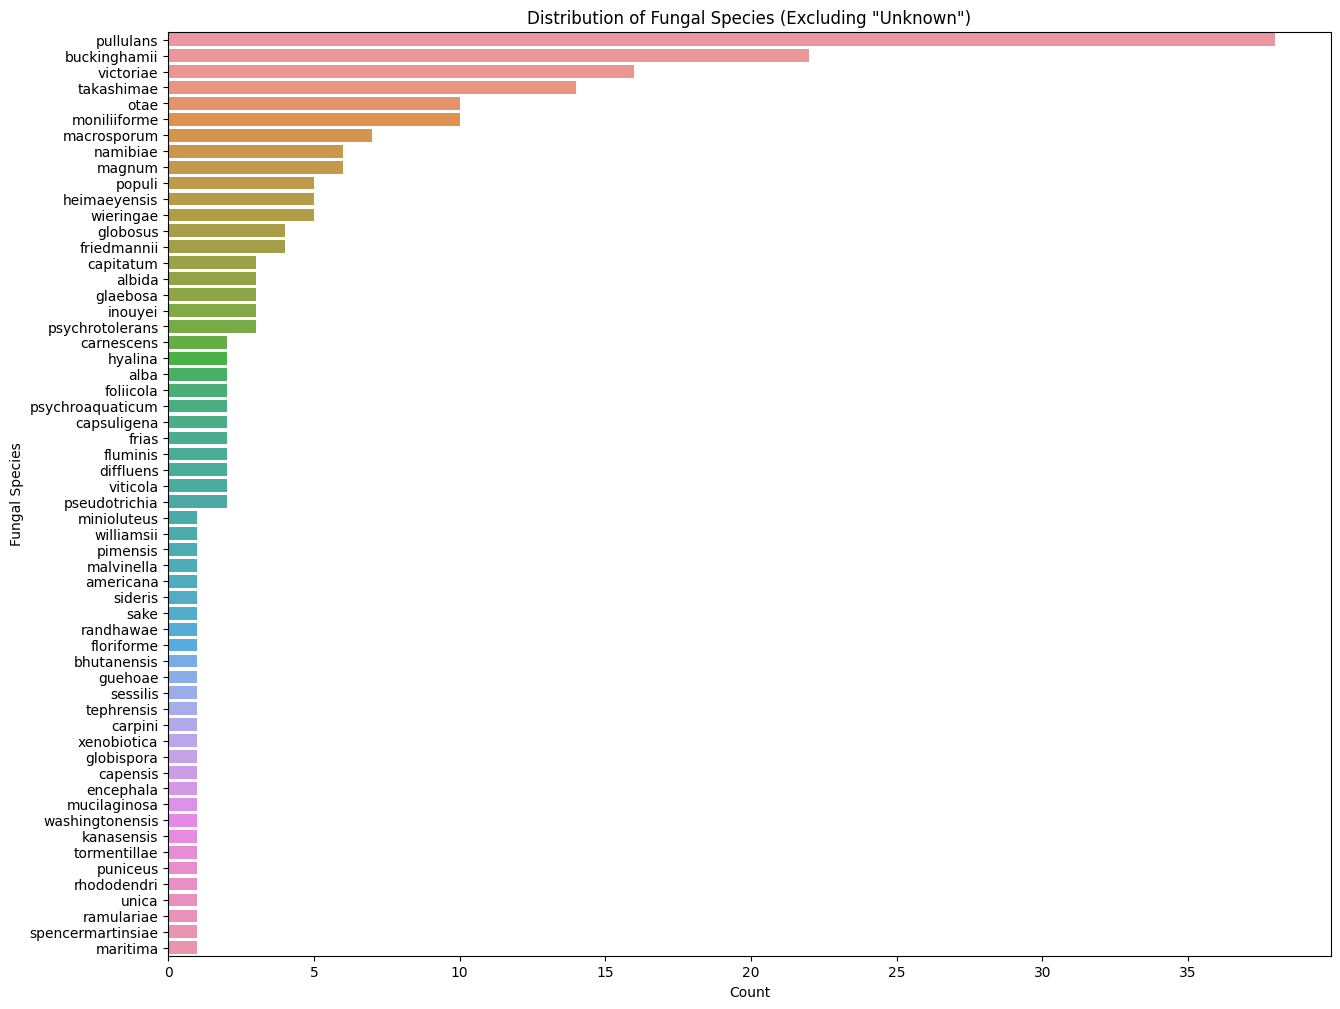

In [ ]:
filtered_df = df[df['Fungus Classification - Species'] != "Unknown"]

plt.figure(figsize=(15, 12))
sns.countplot(data=filtered_df, y='Fungus Classification - Species', order=filtered_df['Fungus Classification - Species'].value_counts().index)
plt.title('Distribution of Fungal Species (Excluding "Unknown")')
plt.xlabel('Count')
plt.ylabel('Fungal Species')
plt.show()


In [ ]:
wns_fungi = df[df['Fungus Classification - Species'] == 'Pseudogymnoascus destructans']
print(f"WNS-causing fungus samples: {len(wns_fungi)}")


WNS-causing fungus samples: 0


In [ ]:
predominant_fungi = df.groupby('Host Species')['Fungus Classification - Phylum'].apply(lambda x: x.mode()[0])
print(predominant_fungi)


Host Species
Antrozous pallidus         Basidiomycota
Corynorhinus townsendii          Unknown
Eptesicus fuscus           Basidiomycota
Euderma maculatum                Unknown
Myotis californicus           Ascomycota
Myotis ciliolabrum               Unknown
Myotis evotis                    Unknown
Myotis lucifugus                 Unknown
Myotis thysanodes             Ascomycota
Myotis velifer             Basidiomycota
Myotis volans                    Unknown
Myotis yumanensis             Ascomycota
Parastrellus hesperus            Unknown
Name: Fungus Classification - Phylum, dtype: object


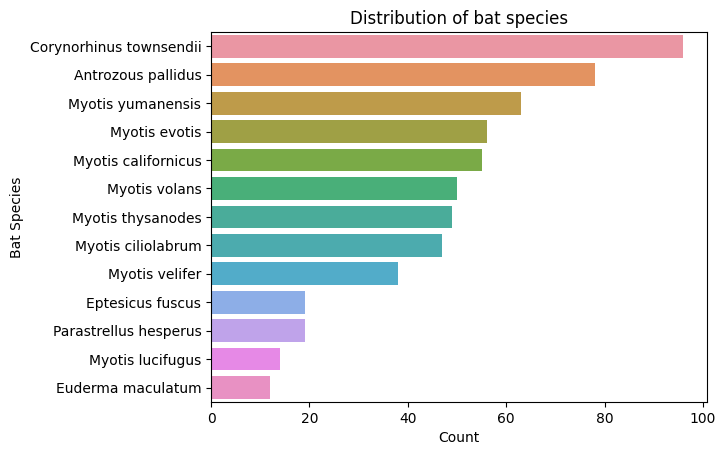

In [ ]:
# distribution of the bat species

sns.countplot(data=df, y='Host Species', order=df['Host Species'].value_counts().index)
plt.title('Distribution of bat species')
plt.xlabel('Count')
plt.ylabel('Bat Species')
plt.show()

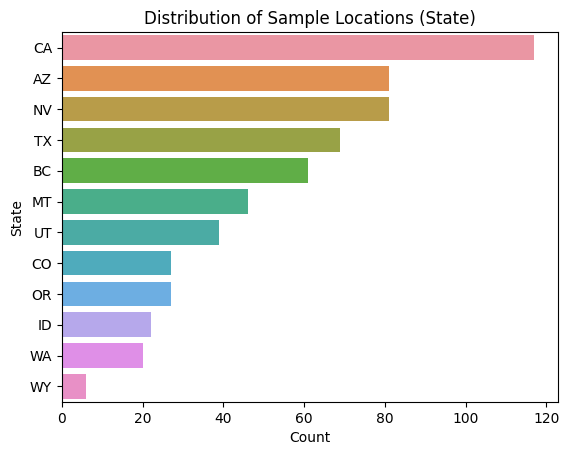

In [ ]:
# distribution of locations
sns.countplot(data=df, y='Sample Location - State', order=df['Sample Location - State'].value_counts().index)
plt.title('Distribution of Sample Locations (State)')
plt.xlabel('Count')
plt.ylabel('State')
plt.show()


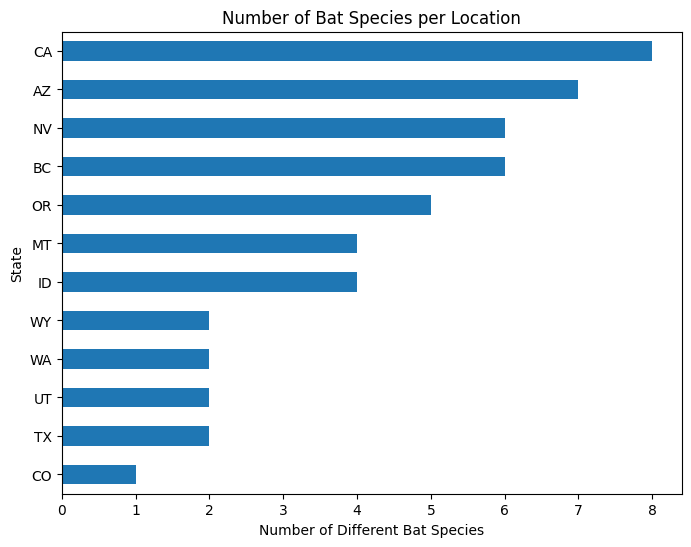

In [ ]:
species_per_location = df.groupby('Sample Location - State')['Host Species'].nunique().sort_values()
species_per_location.plot(kind='barh', figsize=(8, 6))
plt.title('Number of Bat Species per Location')
plt.xlabel('Number of Different Bat Species')
plt.ylabel('State')
plt.show()
